# Búsqueda por profundidad

## Introducción

Ya platicamos de la búsqueda por anchura. Esta es una forma de visitar los vértices de una gráfica dando prioridad a descubrir todos los vecinos de un vértice antes de procesarlos. Ahora hablaremos de la búsqueda por profundidad, en donde damos preferencia a comenzar a procesar los vértices en cuanto los encontremos.

## Descripción de búsqueda por profundidad

En la búsqueda por anchura al visitar un vértices primero nos fijamos en todos los vecinos que tiene, y los agregamos a una lista de elementos por procesar que vamos atendiendo de acuerdo al orden en el que llegaron. Podemos cambiar el orden de nuestra exploración y comprometernos a primero llegar "lo más lejos posible" a partir de un vértice antes de antender a otro de sus vecinos.

Una **búsqueda por profundidad** hace precisamente esto. Primero daremos una explicación con la terminología que usamos en búsqueda por anchura. Luego daremos una formulación alternativa. Sea $G$ una gráfica que queremos explorar y $v_0$ un vértice de $G$.

- Se define una lista $L$ de vértices por procesar, un conjunto $E$ de vértices encontrados y un conjunto $P$ de vértices procesados.
- Se agrega $v_0$ a la lista $L$ y al conjunto $E$.
- Mientras haya al menos un elemento $v$ en $L$, debemos procesarlo, es decir, explorar sus vecinos. Para ello, a cada vecino $w$ de $v$ lo agregamos a $E$ y en ese momento lo comenzamos a procesar. El procesamiento de $P$ terminará cuando procesemos a todos sus vecinos y en ese momento pasamos $v$ de $L$ a $P$.

En búsqueda por anchura primero vemos a todos los vecinos de $v$ y los apuntamos en $E$ para comenzr a procesarlos luego. En búsqueda por profundidad en cuanto encontramos a un nuevo vecino, comenzamos a procesarlo y ver ahora a sus vecinos. Así, es posible que comencemos a procesar un vértice $u$ con vecinos $v$ y $w$. De aquí, $u$ descubriría a $v$. Pero antes de ver a $w$, debemos comenzar a procesar a $v$. Si tuviéramos la arista $vw$, entonces puede pasar que quien descubra a $w$ sea $v$, y no $w$.

**Ejemplo.** Consideremos un ciclo, como el que se muestra mediante el siguiente código.

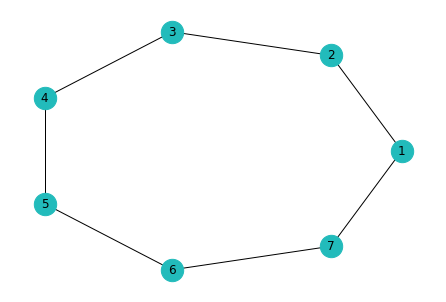

In [2]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (3,4), (4,5), (5,6), (6,7),(7,1)])
nx.draw_kamada_kawai(G,with_labels=True, node_color='#22bbbb',node_size=500)

En una búsqueda por anchura que comienza en el vértice $4$, primero veríamos a los vecinos de $4$, es decir a $3$ y $5$. Luego, a los vecinos de estos, es decir a $2$ y $6$. Luego, a los vecinos de estos, es decir, a $1$ y $7$. Así, los vértices serían descubiertos (y procesados) en el orden $4,3,5,2,6,1,7$.

En una búsqueda por profunidad que comienza en el vértice $4$, primero descubiríamos a $3$. Antes de ver a $5$, tendríamos que $3$ descubre a $2$. Luego $2$ descubre a $1$. Sucesivamente, tenemos que $1$ descubre a $7$, que $7$ descubre a $6$ y que $6$ descubre a $5$. Así, el orden en el que son descubiertos (y procesados) los vértices es $4,3,2,1,7,6,5$.

<span class="math" style="float:right">$\square$</span>

## Implementación de búsqueda por profundidad

Observa que al hacer una búsqueda por profundidad, primero se hacen búsquedas por profundidad en los vecinos. Si una de estas cubre a alguno de sus vecinos, esa ya no se tiene que hacer. Así, podemos poner las búsquedas por profundidad en términos recursivos. 

La siguiente implementación explota esta idea. Como entrada de la función, recibimos una gráfica `G` y un vértice `v0`. La función también tiene un argumento `encontrados`, que es una lista en donde recursivamente se irán almacenando los vértices que se vayan viendo. También tiene un argumento `padres` que va registrando cuál vértice descubrió a cuál otro. Finalmente, agregamos también un entero `tiempo` y diccionarios `inicio_p` y `fin_p`, para registar los "momentos" en los que los vértices se comienzan o terminan de procesar. Más abajo estudiamos algunas propiedades teóricas que justifican llevar esta cuenta.

El orden de recorrido es [1, 0, 3, 7, 8, 6, 2, 10, 4, 9, 5]
El diccionario de padres es {1: None, 0: 1, 3: 1, 7: 3, 8: 7, 6: 8, 2: 6, 10: 2, 4: 2, 9: 6, 5: 7}
El tiempo total usado es 22
El diccionario de inicio de procesamiento es {1: 1, 0: 2, 3: 4, 7: 5, 8: 6, 6: 7, 2: 8, 10: 9, 4: 11, 9: 14, 5: 18}
El diccionario de fin de procesamiento es {0: 3, 10: 10, 4: 12, 2: 13, 9: 15, 6: 16, 8: 17, 5: 19, 7: 20, 3: 21, 1: 22}


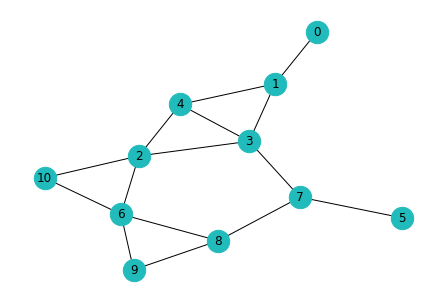

In [15]:
def DFS(G,v0,encontrados=[],padres={},tiempo=0,inicio_p={},fin_p={}):
    tiempo+=1
    inicio_p[v0]=tiempo
    if encontrados==[]:
        encontrados=[v0]
        padres[v0]=None
    for w in G.neighbors(v0):
        if w not in encontrados:
            encontrados.append(w)
            padres[w]=v0
            encontrados,padres,tiempo,inicio_p,fin_p = DFS(G,w,encontrados,padres,tiempo,inicio_p,fin_p)
    tiempo+=1
    fin_p[v0]=tiempo
    return encontrados,padres,tiempo,inicio_p,fin_p

G = nx.Graph()
G.add_edges_from([(0,1), (6,2), (1,3), (1,4), (7,8), (7,3), (10,2), (2,3), (2,4), (3,4), (6,9), (5,7), (6,8), (8,9), (6,10)])
encontrados, padres, tiempo, inicio_p, fin_p=DFS(G,1)
print('El orden de recorrido es {}'.format(encontrados))
print('El diccionario de padres es {}'.format(padres))
print('El tiempo total usado es {}'.format(tiempo))
print('El diccionario de inicio de procesamiento es {}'.format(inicio_p))
print('El diccionario de fin de procesamiento es {}'.format(fin_p))
nx.draw_kamada_kawai(G,with_labels=True, node_color='#22bbbb',node_size=500)
KKL=nx.kamada_kawai_layout(G)

## Algunas propiedades teóricas de búsqueda por profundidad

En la implementación anterior estamos contando el tiempo de inicio y fin de procesamiento para cada vértice $v$. Llamaremos a estas cantidades $t_{\text{in}}(v)$ y $t_{\text{out}}(v)$ respectivamente.

Al igual que en el caso de la búsqueda por anchura, también podemos crear un árbol asociado a la búsqueda por profundidad. La construcción es prácticamente la misma. Dada una gráfica conexa $G$ y un vértice inicial $v_0$ creamos el **arbol por profundidad** $T$ de la siguiente manera. Sus vértices son los vértices de $G$. Ponemos una arista de $v$ a $u$ si $v$ descubrió a $u$ en la búsqueda por profundidad iniciada en $v_0$.

*Ejemplo.* El árbol de profundidad se puede obtener computacionalmente a partir del diccionario `padres` dentro de nuestra implementación. Podemos visualizarlo creando una gráfica dirigida que emana del vértice `v0`. Si hacemos esto con el ejemplo de la sección anterior, obtenemos lo siguiente.

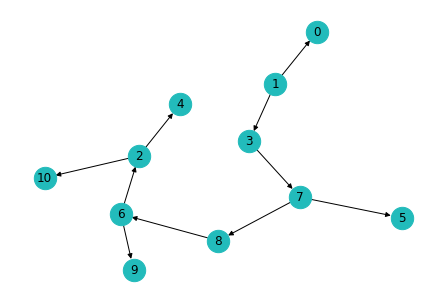

In [19]:
T=nx.DiGraph()
for pair in padres.items():
    if pair[1]!=None:
        T.add_edge(pair[1],pair[0])

nx.draw(T,pos=KKL,with_labels=True, node_color='#22bbbb',node_size=500)

<span class="math" style="float:right">$\square$</span>


Una primera observación es el siguiente resultado, que se sigue del hecho de que cada descendiente de un vértice en el árbol $T$ debe comenzar y terminar de procesarse antes de 

**Proposición.** Sea $v$ un vértice de $G$. La cantidad de descendientes en $T$ de un vértice $v$ es igual a 

$$\frac{t_{\text{out}}(v)-t_{\text{in}}(v)-1}{2}.$$

*Ejemplo.* En el ejemplo que tenemos, observamos que el vértice $8$ tiene cinco descendientes en $T$ que son $6,9,2,4,10$. En efecto, esto coincide con lo que esperaríamos de acuerdo a la fórmula anterior, como se verifica en el siguiente código.

In [24]:
print((fin_p[8]-inicio_p[8]-1)/2)

5.0


<span class="math" style="float:right">$\square$</span>

Otro resultado teórico importante es que las aristas de $G$ están muy bien caracterizadas en términos del árbol por profundidad $T$.

**Proposición.** Sean $u$ y $v$ vértices en $G$. Si $uv$ es arista de $G$, entonces en $T$ se tiene que $u$ es antecesor de $v$, o $v$ es antecesor de $u$.

*Demostración.* Demostaremos que si ni $u$ ni $v$ son antecesor uno del otro en $T$, entonces $uv$ no puede ser una arista de $G$. En particular, la hipótesis implica que ninguno de $u$ o $v$ es padre del otro.

Con el fin de buscar una contradicción, supongamos que $uv$ es una arista. Sea $w$ el ancestro en común de $u$ y $v$ con mayor tiempo de inicio de procesamiento. Por la hipótesis, $u\neq w$ y $v\neq w$. Sean $x$ el segundo vértice de la (única) trayectoria de $w$ a $u$ en $T$ y análogamente sea $y$ el segundo vértice de la (única) trayectoria de $w$ a $v$ en $T$.

Sin pérdida de generalidad, el vértice $x$ comienza a procesarse antes que el vértice $y$. Como $T$ es un árbol por profundidad, se deben de terminar de procesar todos los descendientes de $x$ antes de descubrir a $y$. En particular, la búsqueda debe encontrar a $u$ antes que a $v$. Pero como estamos suponiendo que la arista $uv$ existe, entonces el descubrimiento de $v$ debería darse a lo más durante el procesamiento de $u$. Estas cosas están en contradicción entre sí, y por lo tanto la arista $uv$ no debe existir.

<span class="math" style="float:right">$\square$</span>

*Ejemplo.* Veamos el resultado anterior en la gráfica que hemos estado usando como ejemplo. Notemos que, en efecto, las aristas de $G$ o bien son aristas en $T$ (que son entre hijo y padre), o bien son entre un vértice y un ancestro a distancia al menos $2$.

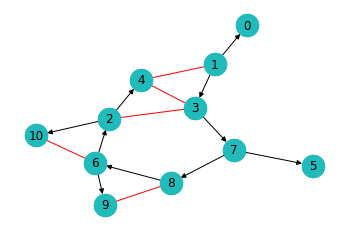

In [36]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots()
extra=nx.difference(G,T.to_undirected())
nx.draw(extra,ax=ax,pos=KKL, node_color='#22bbbb',node_size=500,edge_color='red')
nx.draw(T,ax=ax,pos=KKL,with_labels=True, node_color='#22bbbb',node_size=500)

<span class="math" style="float:right">$\square$</span>

## Tarea moral

Los siguientes problemas te ayudarán a practicar lo visto en esta entrada. Para resolverlos, necesitarás usar herramientas matemáticas, computacionales o ambas.

1. Dibuja una gráfica con el siguiente conjunto de aristas. Luego, realiza manualmente una búsqueda por profundidad que comience en el vértice $a$:

   $$E=\{ag,ad,bf,cd,bd,be,bh,fi,ei,gh\}.$$
2. Sea $G$ una gráfica conexa. Realiza varios ejemplos para verificar que el árbol por profundidad depende de en qué vértice se inicia, y también de en qué orden se consideran los vecinos de cada vértice.
3. Para cada uno de los siguiente incisos, realiza un cambios en la implementación que dimos de búsqueda por profundidad para que se cumpla lo que se pide.
   - Se interrumpa la búsqueda una vez que se hayan encontrado 100 vértices.
   - Se enlisten las aristas.
   - Se interrumpa la búsqueda una vez que la variable `tiempo` exceda un valor dado por el usuario.
   - Nunca se busque a profundidad más de $10$.
   - Se encuentre un triángulo, es decir, una terna de vértices $u,v,w$ tales que $uv$, $vw$ y $wu$ son aristas.
4. Sea $G$ una gráfica conexa y $T$ uno de sus árboles por profundidad. Sean $u$ y $v$ vértices de $G$. Muestra que $u$ es descendiente de $G$ si y sólo si el intervalo de tiempo de procesamiento de $u$ está anidado en el de $v$. Es decir, que esto sucede si y sólo si:

   $$t_{\text{in}}(v) \leq t_{\text{in}}(u) \leq t_{\text{out}}(u) \leq t_{\text{out}}(v).$$
5. Adapta el algoritmo búsqueda por profundidad para:
   - Explorar gráficas dirigidas.
   - Explorar completamente gráficas no conexas.